In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [2]:
# Load digits dataset from sklearn
digits = load_digits()

X = digits.data
y = digits.target

print("✅ Dataset Loaded Successfully!")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


✅ Dataset Loaded Successfully!
Shape of X: (1797, 64)
Shape of y: (1797,)


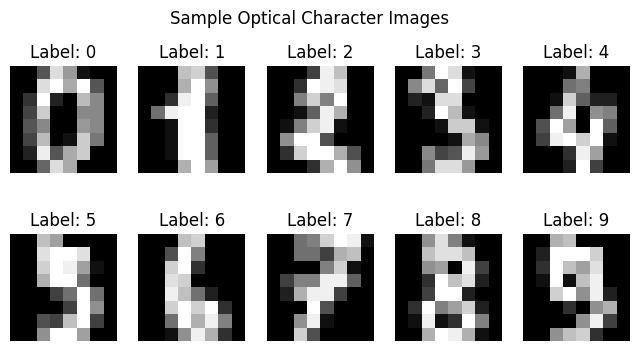

In [3]:
plt.figure(figsize=(8, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.suptitle("Sample Optical Character Images")
plt.show()


In [4]:
# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert target to categorical (One-hot encoding)
y_categorical = to_categorical(y)

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "| Test shape:", X_test.shape)


Train shape: (1437, 64) | Test shape: (360, 64)


In [5]:
model = Sequential([
    Dense(64, input_shape=(64,), activation='relu', name="Hidden_Layer_1"),
    Dropout(0.2),
    Dense(32, activation='relu', name="Hidden_Layer_2"),
    Dense(10, activation='softmax', name="Output_Layer")
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()


C:\Users\vishw\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)          │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,570 (25.66 KB)

 Trainable params: 6,570 (25.66 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.2030 - loss: 2.2803 - val_accuracy: 0.6250 - val_loss: 1.5229
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6347 - loss: 1.3742 - val_accuracy: 0.7889 - val_loss: 0.8676
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7996 - loss: 0.7846 - val_accuracy: 0.8806 - val_loss: 0.5046
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8865 - loss: 0.4641 - val_accuracy: 0.9306 - val_loss: 0.3302
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9319 - loss: 0.3210 - val_accuracy: 0.9361 - val_loss: 0.2586
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9439 - loss: 0.2420 - val_accuracy: 0.9361 - val_loss: 0.2156
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9553 - loss: 0.1941 - val_accuracy: 0.9611 - val_loss: 0.1813
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9568 - loss: 0.1930 - val_accuracy: 0.9667 - v

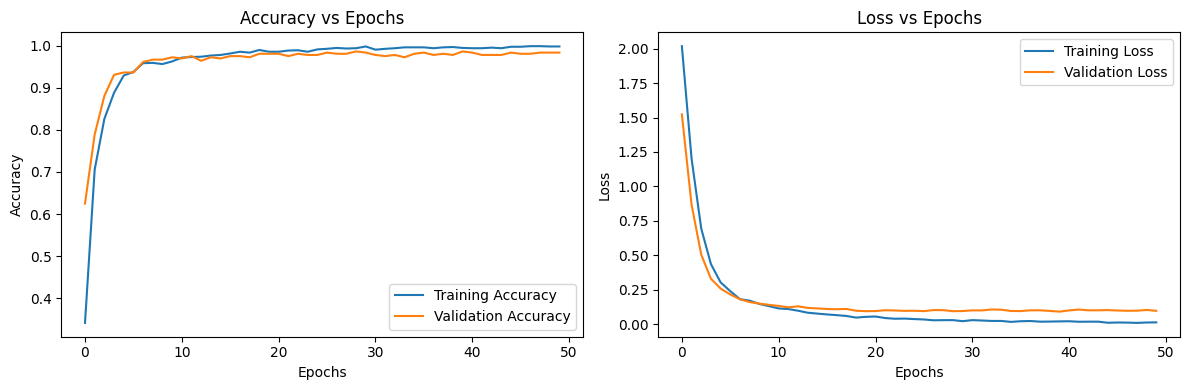

In [7]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Test Loss: {loss:.4f}")
print(f"✅ Test Accuracy: {acc*100:.2f}%")


✅ Test Loss: 0.0973
✅ Test Accuracy: 98.33%


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


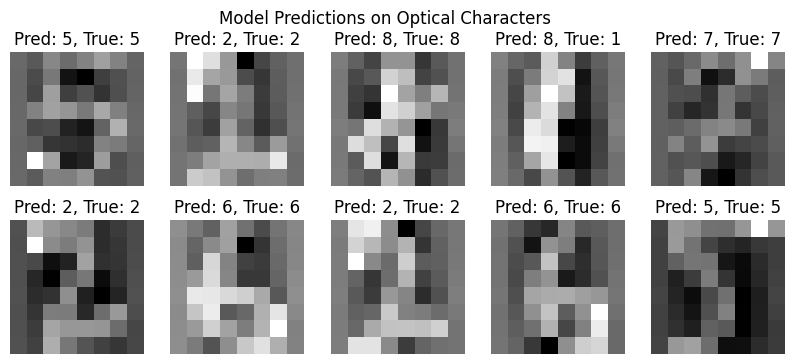

In [9]:
# Make predictions on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Show first 10 predictions
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f"Pred: {y_pred_classes[i]}, True: {y_true[i]}")
    plt.axis('off')
plt.suptitle("Model Predictions on Optical Characters")
plt.show()
